# Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". The data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: http://www.robots.ox.ac.uk/~vgg/data/vgg_face/.

## Downloading of Data

You can download the data using the following code:

In [156]:
import gzip, urllib, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.utils import to_categorical

!pip install h5py
import h5py

keras.__version__

'2.3.1'

In [42]:
# Get path to where datasets are saved
BASE_PATH = os.path.join(os.getcwd(), "..", "datasets")
print("Directory: " + base_path)
print("Existing Sub-Directories: " + str(os.listdir(base_path)))

# Directory/File where data is saved in
DS_DIR = os.path.join(base_path, "8_faces")
FILE_PATH_TRAIN = os.path.join(DS_DIR, "8_faces_train_and_valid.hdf5")

# Load File if not already existent in dataset directory
if not os.path.isfile(FILE_PATH_TRAIN):
    print("Request data")
    os.mkdir(DS_DIR)
    url = "https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1"
    urllib.request.urlretrieve(url, FILE_PATH_TRAIN)
    print("Loaded file")
    
    
print("Files: " + str(os.listdir(DS_DIR)))

Directory: /home/jovyan/work/../datasets
Existing Sub-Directories: ['8_faces', 'MNIST']
Files: ['8_faces_train_and_valid.hdf5', '8_faces_test.hdf5']


In [43]:
# Check values
h5f_X = h5py.File(FILE_PATH_TRAIN, 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


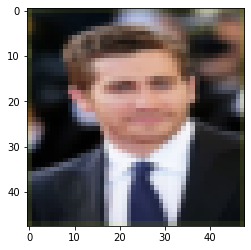

In [44]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 1
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [45]:
FILE_PATH_TEST = os.path.join(DS_DIR, '8_faces_test.hdf5')

#Downloading the data, if it does not exist
if not os.path.isfile(FILE_PATH_TEST):
    print("Load test-files")
    url = "https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1"
    urllib.request.urlretrieve(url, FILE_PATH_TEST)
    print("Test files loaded")

# Check values
h5f_X = h5py.File(FILE_PATH_TEST, 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [46]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

### Playing around with the data

In [54]:
print("Train-Samples: " + str(X_train.shape[0]))
print("X-Training: " + str(X_train.shape))
print("Y-Training: " + str(Y_train.shape))

print("\n------------\nTest-Samples: " + str(X_test.shape[0]))
print("X-Test: " + str(X_test.shape))
print("Y-Test: " + str(Y_test.shape))

Train-Samples: 2000
X-Training: (2000, 48, 48, 3)
Y-Training: (2000,)

------------
Test-Samples: 400
X-Test: (400, 48, 48, 3)
Y-Test: (400,)


## a) Training an CNN from scratch

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

- [x] Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy. 
- [x] Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
- [ ] Calculate the confusion matrix
- [ ] Have a look at missclassified examples

Image of the network:
https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [92]:
class_labels = {
    0: "Miranda Cosgrove",
    1: "Chris Martin",
    2: "Emma Stone",
    3: "Jamie Foxx",
    4: "Steve Jobs",
    5: "Zac Efron",
    6: "Sandra Oh",
    7: "Taryn Manning"
}

In [105]:
Y_train_encoded = to_categorical(Y_train)
Y_train_encoded.shape

(2000, 8)

In [199]:
model = Sequential()

# Input layer
model.add(Dense(5, input_shape = (48, 48, 3), activation = "relu"))

# Hidden layers
model.add(Conv2D(10, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(15, (3, 3), padding = "same", activation = "relu"))


# Output-layer
model.add(Flatten())
model.add(Dense(len(class_labels.keys()), input_shape=(8,), activation = "softmax"))

model.summary()

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 48, 48, 5)         20        
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 48, 48, 10)        460       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 48, 48, 15)        1365      
_________________________________________________________________
flatten_41 (Flatten)         (None, 34560)             0         
_________________________________________________________________
dense_101 (Dense)            (None, 8)                 276488    
Total params: 278,333
Trainable params: 278,333
Non-trainable params: 0
_________________________________________________________________


In [210]:
# Compile & train model
model.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics = ["acc"])
history = model.fit(X_train, Y_train_encoded, epochs = 30, batch_size = 200)

Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.8242 - acc: 0.7255
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7749 - acc: 0.7480
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7638 - acc: 0.7510
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.8409 - acc: 0.7300
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.7100 - acc: 0.7735
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7701 - acc: 0.7480
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7302 - acc: 0.7555
Epoch 8/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.7656 - acc: 0.7605
Epoch 9/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6830 - acc: 0.7845
Epoch 10/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.6973 - acc: 0.7665
Epoch 11/30
2000/2000 [======

In [211]:
Y_test_encoded = to_categorical(Y_test)
model.evaluate(X_test, Y_test_encoded)

400/400 [==============================] - 1s 2ms/step


[1.5554409980773927, 0.5325000286102295]

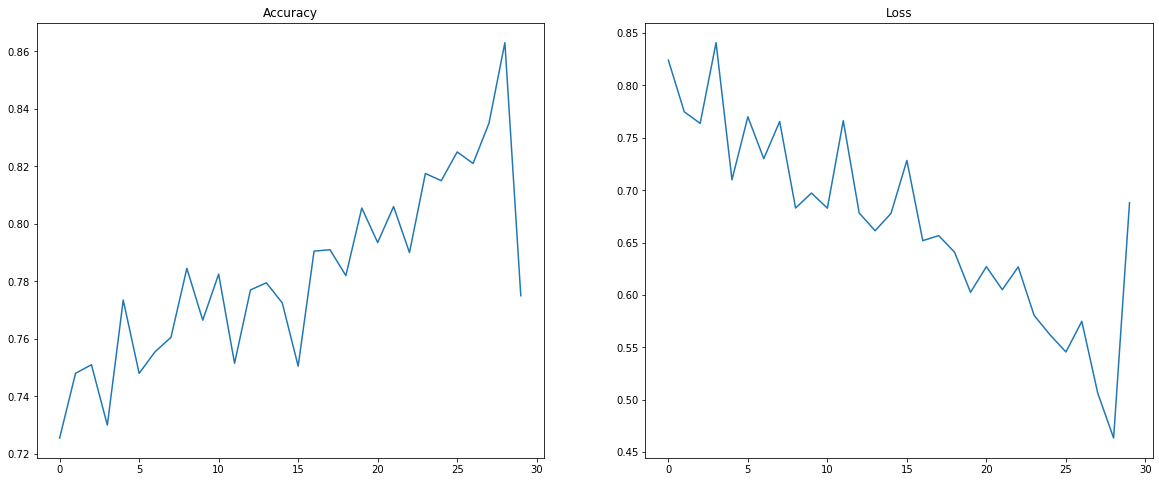

In [214]:
fig = plt.figure(figsize = (20,8))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history.history["acc"])
plt.subplot(122)
plt.title("Loss")
plt.plot(history.history["loss"])

## b) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

```
my_dense1 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300     
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808       
```

Use the following code as a starting point:

In [47]:
from keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))


58892288/58889256 [==============================] - 284s 5us/step


In [28]:
fc1 = base_model.output
fc1 = Flatten()(fc1)
#...
#Your code here
#...
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
#model_trans.summary()

In [29]:
#base_model.summary()
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense4


Do the same analysis as in a) above. You should get an accuracy of approx 0.61

## c) Try to get better.

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.